Here's a simple hierarchial model

Assume there are $N$ users and each has $M$ observations.

\begin{aligned}
u \sim & \mathrm{Normal}(0,10) \\
w_i \sim & \mathrm{Norma}(u,.10), & 1 \leq i \leq N \\
σ^2 \sim & \mathrm{Gamma}(1,1) \\
y_{ij} \sim & \mathrm{Normal}(x_{ij}w_i, σ^2), & 1 \leq i \leq N, 1 \leq j \leq M\\
\end{aligned}


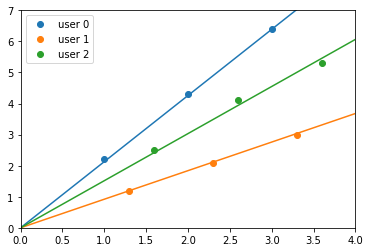

In [5]:
from pangolin import Given, d, t, I, IID, vmap, sample, E, P, var, std, cov, corr, makerv, jags_code
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(formatter={'float': '{:6.2f}'.format}) # print nicely


# simple heirarchical model

# we want to fit linear equations for three different users

X_train = [[1,2,3],[1.3,2.3,3.3],[1.6,2.6,3.6]]
y_train = [[2.2,4.3,6.4],[1.2,2.1,3.0],[2.5,4.1,5.3]]

for xi_train,yi_train,i in zip(X_train,y_train,range(3)):
    plt.plot(xi_train,yi_train,'o',label='user '+str(i))
plt.legend()
plt.xlim([0,4])
plt.ylim([0,7])

# define proabbilistic model
u = d.norm(0,.1)        # global mean
w = IID(d.norm(u,10),3) # weights for each user
s = d.gamma(1,1)        # global noise

# generates output for a single user (i) and observation (j)
def get_y_ij(x_ij,w_i,s):
    return d.norm(x_ij*w_i,1/s)

# all observations for one user
get_y_i  = vmap(get_y_ij,[True,False,False])
# all observations for all users
get_y    = vmap(get_y_i,[True,True,False])
# actuall run the function
y = get_y(X_train,w,s)

w_mean = E(w,Given(y==y_train))

plt.gca().set_prop_cycle(None)

for wi_mean in w_mean:
    xrange = np.arange(5)
    plt.plot(xrange,xrange*wi_mean)
plt.show()


Notice the curves are "pulled in" towards each other a bit. That's due to the shared global latent variable.

In [6]:
print(jags_code(y))

model{
v66v~dnorm(v64v,v65v);
for (i0 in 1:3){
  v69v[i0]~dnorm(v66v,v67v);
}
for (i1 in 1:3){
  for (i0 in 1:3){
    v85v[i1,i0]<-(v73v[i1,i0])*(v69v[i1]);
  }
}
v72v~dgamma(v70v,v71v);
for (i1 in 1:3){
  for (i0 in 1:3){
    v86v[i1,i0]<-(v79v)/(v72v);
  }
}
for (i1 in 1:3){
  for (i0 in 1:3){
    v87v[i1,i0]~dnorm(v85v[i1,i0],v86v[i1,i0]);
  }
}
}

